In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
np.random.seed(42)

genes = [f"ENSG00000{str(i).zfill(5)}" for i in range(100)]
samples = [f"D{i:02d}" for i in range(1,6)] + [f"H{i:02d}" for i in range(1,6)]
groups = ['disease'] * 5 + ['healthy'] * 5

base_counts = np.random.poisson(lam=100, size=(100,10)) # 
noise = np.random.normal(loc=0, scale=30, size=(100,10)) # loc = center of the distribution, scale = standard deviation, size = size of the matrix
noisy_counts = np.clip(base_counts + noise, a_min=0, a_max=None).astype(int)

noisy_counts[:,7] = np.random.poisson(lam=300, size=100)

df_counts = pd.DataFrame(noisy_counts, index=genes, columns=samples)
meta_data = pd.DataFrame({
    'sample': samples,
    'group': groups
})

In [144]:
encoded_groups = []
for group in groups:
    if group == 'disease':
        encoded_groups.append(0)
    else:
        encoded_groups.append(1)

encoded_groups

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

/tmp/ipykernel_5316/1544069922.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


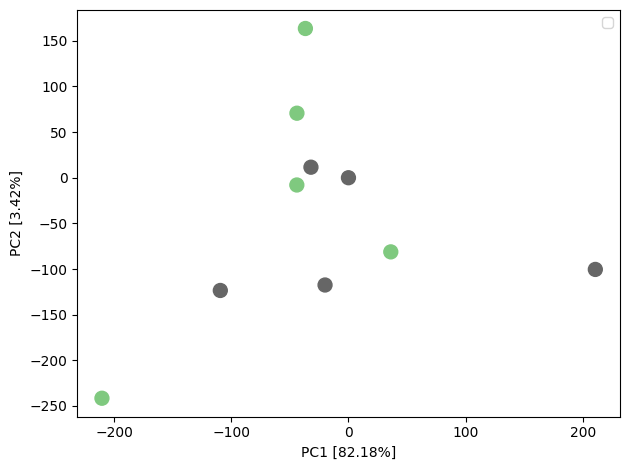

In [145]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca_counts = pca.fit_transform(noisy_counts.T)

pca_explained_variance = 100 * pca.explained_variance_ / np.sum(pca.explained_variance_)

plt.scatter(pca_counts[0], pca_counts[1], 
            cmap='Accent', 
            c=encoded_groups,
            s=100)
plt.xlabel(f"PC1 [{round(pca_explained_variance[0], 2)}%]")
plt.ylabel(f"PC2 [{round(pca_explained_variance[1], 2)}%]")
plt.legend()
plt.tight_layout()

In [146]:
# gene expression df
np.random.seed(13)
genes = [f"ENSG00000{str(i).zfill(5)}" for i in range(1000)]
samples = [f"D{str(i).zfill(2)}" for i in range(20)]
counts = np.random.poisson(lam=50, size=(1000,20))
noise = np.random.normal(loc=25, scale=10, size=(1000,20))
noisy_counts = np.clip(counts + noise, a_min=0, a_max=None).astype(int)

df = pd.DataFrame(
    noisy_counts, index=genes, columns=samples
)

groups = ["healthy"] * 10 + ["disease"] * 10

meta_data=pd.DataFrame({
    "sample" : samples,
    "condition" : groups,
})

meta_data['condition']=meta_data['condition'].map({"healthy":0, "disease":1})

In [147]:
df[meta_data[meta_data.condition == 1]['sample'].to_list()] = np.random.poisson(lam = 90, size = (1000, 10))

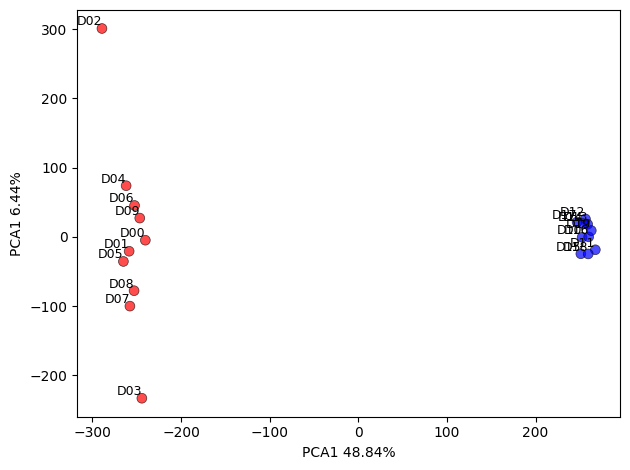

In [237]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from adjustText import adjust_text

dfT = df.T
features = dfT.columns
samples = dfT.reset_index(names=['sample'])['sample'].to_list()
counts = dfT.to_numpy()

pca = PCA(n_components=10)
countsPCA = pca.fit_transform(counts)
variancePCA = pca.explained_variance_ / sum(pca.explained_variance_) * 100

# PCA Plot ----
colors = ['red', 'blue']
custom_cmap = ListedColormap(colors)

x = countsPCA[:,0]
y = countsPCA[:,1]

plt.scatter(countsPCA[:,0], countsPCA[:,1], c=meta_data['condition'], cmap=custom_cmap, s=50, edgecolors='black', linewidths=0.5, alpha = 0.7)
[plt.text(x[i], y[i], samples[i], fontsize=9, ha='right', va='bottom') for i in range(len(x))]
plt.xlabel(f"PCA1 {round(variancePCA[0], 2)}%")
plt.ylabel(f"PCA1 {round(variancePCA[1], 2)}%")
plt.tight_layout()

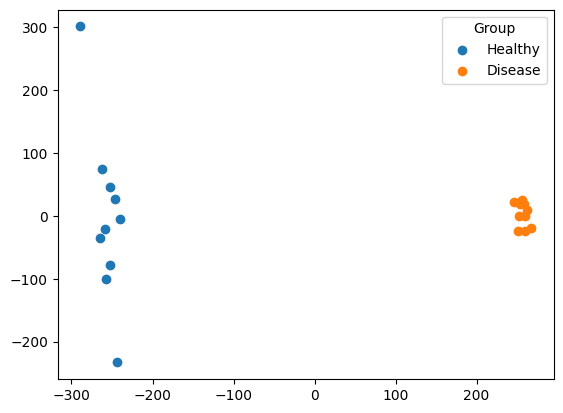

In [236]:
countsPCA_df = pd.DataFrame(countsPCA, index=samples)
countsPCA_df = countsPCA_df.reset_index(names=['sample'])
PCs = [f"PC{str(i+1)}" for i in range(10)]
countsPCA_df.columns = ['sample'] + PCs # NOT ['sample', PCs] ==> WHICH IS ['sample', ['PC1', ... ,'PC10']]

healthy = meta_data[meta_data['condition']==0]['sample'].to_list()
disease = meta_data[meta_data['condition']==1]['sample'].to_list()

healthydf = []
diseasedf = []
for i in samples:
    if i in healthy:
        vals = countsPCA_df[countsPCA_df['sample'] == i]
        healthydf.append(vals)
    else:
        valsd = countsPCA_df[countsPCA_df['sample'] == i]
        diseasedf.append(valsd)

df_pca_h = pd.DataFrame(np.concatenate(healthydf))
df_pca_d = pd.DataFrame(np.concatenate(diseasedf))

for i in [df_pca_h, df_pca_d]:
    i.columns = ['Sample'] + PCs


plt.scatter(df_pca_h['PC1'], df_pca_h['PC2'], label='Healthy')
plt.scatter(df_pca_d['PC1'], df_pca_d['PC2'], label='Disease')
plt.legend(title="Group")